In [1]:
# IMPORT LIBRARIES 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
# LOADING DATA 
df = pd.read_csv("Gene Expression Analysis and Disease Relationship.csv")

print(df.shape)
print(df.head())
print(df.info())

(1000, 8)
   PatientID  Age  Gender  Gene_X_Expression  Gene_Y_Expression  \
0          1   45       0               5.78               3.21   
1          2   62       1               7.12               5.89   
2          3   38       0               3.15               1.98   
3          4   55       1               6.54               4.76   
4          5   71       0               8.01               6.55   

   SmokingStatus  DiseaseStatus  TreatmentResponse  
0              1              1                  1  
1              2              2                  0  
2              0              0                  2  
3              1              1                  1  
4              2              2                  0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          1000 non-null   int64  
 1   Age            

In [3]:
# Handle missing values 
df= df.dropna()

df["Gender"] = df["Gender"].map({0: "female", 1: "Male"})
df["SmokingStatus"] = df["SmokingStatus"].map({0: "Non-smoker", 1: "Ex-smoker", 2: "Current Smoker"})
df["DiseaseStatus"] = df["DiseaseStatus"].map({0: "Healthy", 1: "Disease A", 2: "Disease B"})
df["TreatmentResponse"] = df["TreatmentResponse"].map({0: "No Response", 1: "Partial Response", 2: "Full Response"})


In [4]:
summary= df.describe()
print(summary)



         PatientID          Age  Gene_X_Expression  Gene_Y_Expression
count  1000.000000  1000.000000         1000.00000         1000.00000
mean    500.500000    49.631000            3.92314            3.62837
std     288.819436    17.608774            2.00056            1.94636
min       1.000000    20.000000            0.51000            0.30000
25%     250.750000    34.000000            2.19750            1.95000
50%     500.500000    49.000000            3.88500            3.58500
75%     750.250000    65.000000            5.61250            5.33000
max    1000.000000    80.000000            9.01000            7.55000


In [5]:
grouped = df.groupby("DiseaseStatus")[["Gene_X_Expression", "Gene_Y_Expression"]].mean()
print(grouped)


               Gene_X_Expression  Gene_Y_Expression
DiseaseStatus                                      
Disease A               6.402778           4.581667
Disease B               7.943500           6.519000
Healthy                 3.793160           3.550437


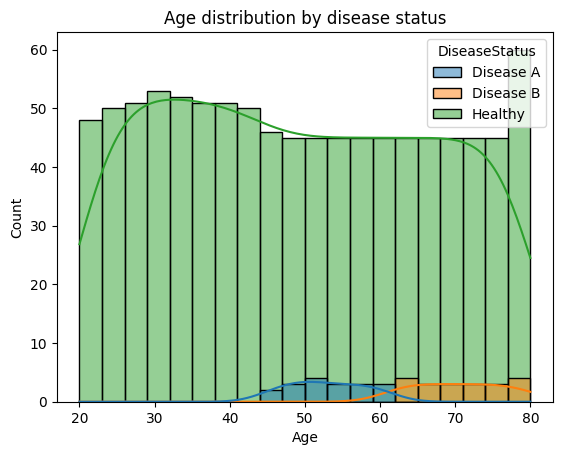

In [6]:
# Age distribution by disease status(VISUALIZATION)
plt.figure()
sns.histplot(data=df, x="Age", hue="DiseaseStatus", bins=20, kde=True)
plt.title("Age distribution by disease status")
plt.show()


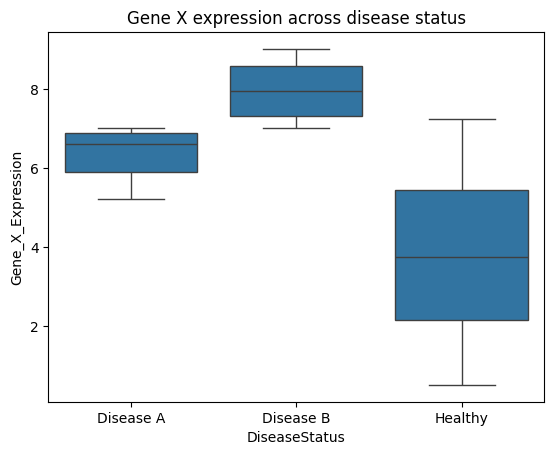

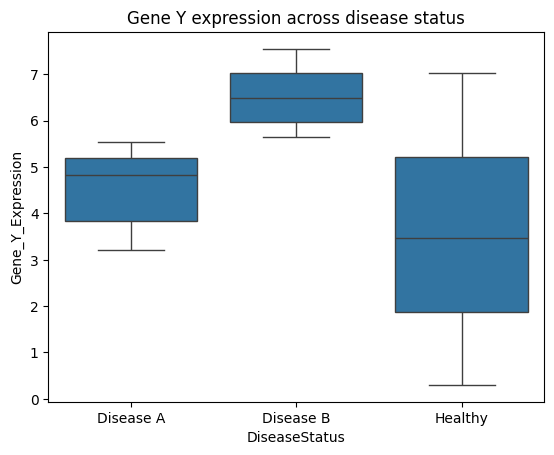

In [7]:
# Gene expression using disease 
plt.figure()
sns.boxplot(data=df, x="DiseaseStatus", y="Gene_X_Expression")
plt.title('Gene X expression across disease status')
plt.show()


plt.figure()
sns.boxplot(data=df, x="DiseaseStatus", y="Gene_Y_Expression")
plt.title("Gene Y expression across disease status")
plt.show()


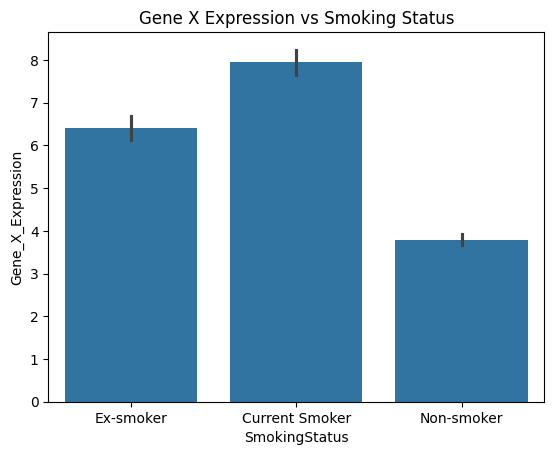

In [8]:
#Smoking status v/s gene expression 
plt.figure()
sns.barplot(data=df, x="SmokingStatus", y="Gene_X_Expression")
plt.title("Gene X Expression vs Smoking Status")
plt.show()

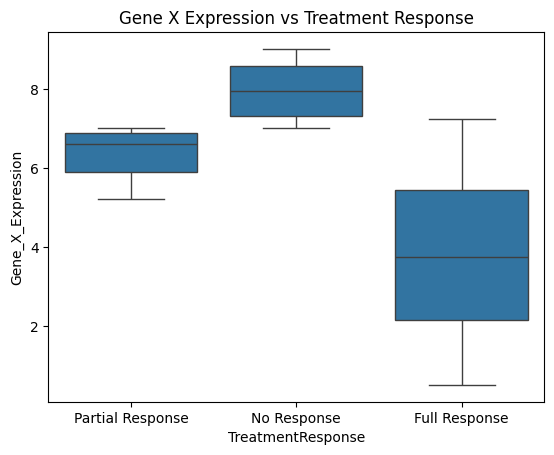

In [9]:
# TREATMENT RESPONSE vs Gene Expression 
plt.figure()
sns.boxplot(data=df, x="TreatmentResponse", y="Gene_X_Expression")
plt.title("Gene X Expression vs Treatment Response")
plt.show()

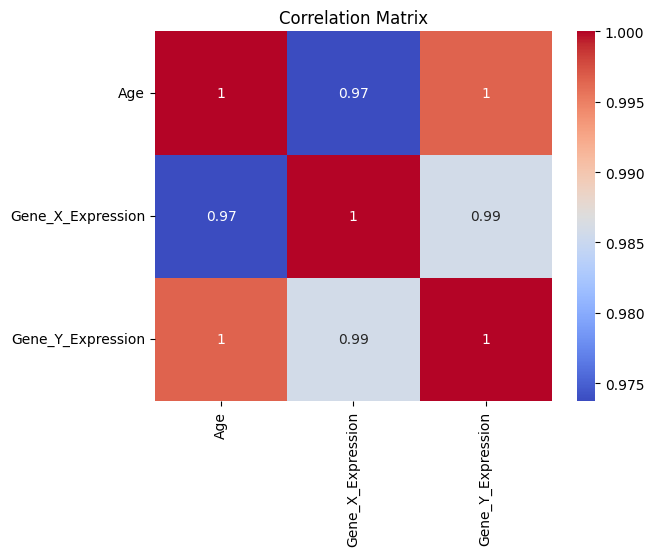

In [12]:
#Coorelation 
plt.figure()
coorelation= df[["Age", "Gene_X_Expression", "Gene_Y_Expression"]].corr()
sns.heatmap(coorelation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()